In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from random import *
%matplotlib inline

In [2]:
%run -i 'data_pipeline.py'

In [3]:
ratings_df

,movie,critic_score,audience_score,release_date,audience_tomatometer,critic_tomatometer,score_difference
0,The Invisible Man,91,88,"Feb 28, 2020",Fresh,Fresh,-3
1,The Way Back,83,84,"Mar 6, 2020",Fresh,Fresh,1
2,Never Rarely Sometimes Always,99,72,"Mar 13, 2020",Fresh,Fresh,-27
3,Bad Boys for Life,77,96,"Jan 17, 2020",Fresh,Fresh,19
4,Sonic the Hedgehog,64,93,"Feb 14, 2020",Fresh,Fresh,29
...,...,...,...,...,...,...,...
5943,In Time,37,51,"Oct 28, 2011",Rotten,Rotten,14
5944,Shut Up Little Man!,68,62,"Aug 26, 2011",Fresh,Fresh,-6
5945,Project Nim,97,84,"Jul 8, 2011",Fresh,Fresh,-13
5946,Resurrect Dead: The Mystery of the Toynbee Tiles,65,81,"Sep 2, 2011",Fresh,Fresh,16


# Hypothesis Test ( Are means the Same)

##### Null Hypothesis: The mean of the critic scores equals the mean of the audience scores.

##### Alternative Hypothesis: The mean of the critic scores does not equals the mean of the audience scores.

##### Significance Level= 0.05

In [4]:
ratings_df['critic_score'].mean(),ratings_df['audience_score'].mean()

(61.595998655010085, 57.66156691324815)

In [5]:
stat,p_val=stats.ttest_ind(ratings_df['critic_score'],ratings_df['audience_score'])
stat,p_val

(8.610561144248239, 8.182194263833515e-18)

#### Reject Null. The mean of critic and audience scores is not equal.

# Hypothesis Test ( Are means within 5 points of each other)

##### Null Hypothesis: The mean critic score - The mean audience score <=5

##### Alternative Hypothesis: The mean critic score - the mean audience score is greater than   >5

##### Significance Level= 0.05

In [6]:
ratings_df['score_difference'].mean()

-3.9344317417619368

In [41]:
def ttest_range(range_,alpha):
    count=0
    p_val_and_diff=[]
    for i in range(1,range_):
        stat,p_val=stats.ttest_ind(ratings_df['critic_score']-i,ratings_df['audience_score'])
        if p_val > alpha:
            count+=1
            p_val_and_diff.append(p_val)
            p_val_and_diff.append(i)
            
    if count==0:
        print("Reject the Null")
    else:
        print(f"A difference of {p_val_and_diff[1]} with a p value of {p_val_and_diff[0]} causes us to Fail to Reject Null")
ttest_range(5,0.05)

A difference of 4 with a p value of 0.8859000420527753 causes us to Fail to Reject Null


#### Fail to Reject Null. The mean Audience score and Mean score are within 5 points of each other.

# Bayesian Test ( What is the probability the scores are within 5 points )

In [8]:
prob = round((abs(ratings_df['critic_score'] - ratings_df['audience_score'])<=5).mean() * 100, 2)
prob

17.15

####  The Audience score is within 5 points of the critic score 16.68% of the time.

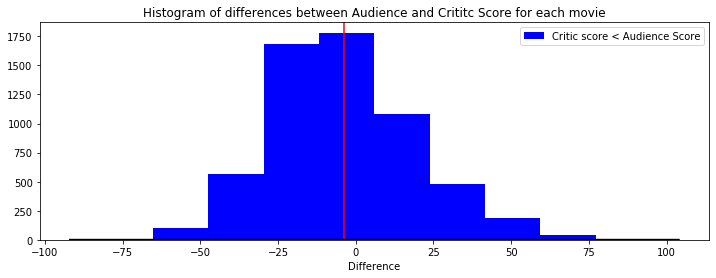

In [47]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.hist(ratings_df['score_difference'],color='b',label=('Critic score < Audience Score'))
ax.set_xlabel('Difference')
ax.legend()
ax.set_title("Histogram of differences between Audience and Crititc Score for each movie")
plt.savefig('score_diff_hist.png')
plt.axvline(x=-3.9,color='r')

mu, std = stats.norm.fit(ratings_df['score_difference'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

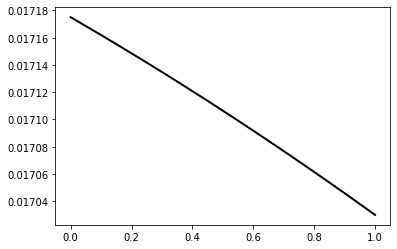

In [48]:
mu, std = stats.norm.fit(ratings_df['score_difference'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)